In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tables

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
MC_file = tables.open_file("bb0nu_MC.h5",mode='r')
root = MC_file.root.MC
data = root
Nevents = len(data.events)

In [3]:
# Pull the extents so teh MC events can be sorted
DatL=[]
DatL.append(0)
for x in range(0,Nevents):
    DatL.append(data.extents[x]["last_hit"])

In [4]:
reco_group_name = '/FANALIC/RECO_fwhm_07_voxel_10x10x10'
file_events = pd.read_hdf("bb0nu_RECO.h5", reco_group_name + '/events')
file_voxels = pd.read_hdf("bb0nu_RECO.h5", reco_group_name + '/voxels')
events_reco_df = pd.DataFrame()
voxels_reco_df = pd.DataFrame()
events_reco_df = pd.concat([events_reco_df, file_events], axis=0)
voxels_reco_df = pd.concat([voxels_reco_df, file_voxels], axis=0)

In [5]:
Nevents

2107

In [6]:
 with tb.open_file(MC_Curr) as MC:
        ct+=1
        data = MC.root.MC
        Nevents = int(data.configuration.read()[2][-1])
        DatL = np.where(data.hits.read()["hit_id"] ==0)[0]

        DATA = data.particles.read()

        IDs = np.unique(DATA['event_id'])
        Origin_Z = []
        Origin_R = []


        for EVENT in IDs:
            loc = np.where(DATA['event_id'] == EVENT)[0][0]

            MC_X = DATA["initial_x"][loc]
            MC_Y = DATA["initial_y"][loc]
            MC_Z = DATA["initial_z"][loc]

NameError: name 'tb' is not defined

In [7]:
data

/MC (Group) ''
  children := ['configuration' (Table), 'events' (Table), 'extents' (Table), 'hits' (Table), 'particles' (Table), 'sensor_positions' (Table), 'waveforms' (Table)]

In [8]:
data.particles

/MC/particles (Table(69626,)) ''
  description := {
  "particle_indx": Int32Col(shape=(), dflt=0, pos=0),
  "particle_name": StringCol(itemsize=20, shape=(), dflt=b'', pos=1),
  "primary": Int8Col(shape=(), dflt=0, pos=2),
  "mother_indx": Int32Col(shape=(), dflt=0, pos=3),
  "initial_vertex": Float32Col(shape=(4,), dflt=0.0, pos=4),
  "final_vertex": Float32Col(shape=(4,), dflt=0.0, pos=5),
  "initial_volume": StringCol(itemsize=20, shape=(), dflt=b'', pos=6),
  "final_volume": StringCol(itemsize=20, shape=(), dflt=b'', pos=7),
  "momentum": Float32Col(shape=(3,), dflt=0.0, pos=8),
  "kin_energy": Float32Col(shape=(), dflt=0.0, pos=9),
  "creator_proc": StringCol(itemsize=20, shape=(), dflt=b'', pos=10)}
  byteorder := 'little'
  chunkshape := (32768,)

In [102]:
data.events.read()

array([(2500, 2.4578302), (2501, 2.4578302), (2502, 2.4578302), ...,
       (4604, 2.4578302), (4605, 2.4578302), (4606, 2.4578302)],
      dtype=[('evt_number', '<i4'), ('evt_energy', '<f4')])

In [100]:
data.particles.read()[0]

(2, b'e-', 1, 0, [-174.85088, 1285.5037 , -713.9089 ,    0.     ], [-1.6403845e+02,  1.2666760e+03, -6.7013519e+02,  2.9330483e-01], b'ACTIVE', b'ACTIVE', [ 0.55163276, -1.4402025 ,  0.3019409 ], 1.1415054, b'none')

In [119]:
loc = np.where(data.particles.read()['primary']==1)[0]

In [120]:
data.particles.read()['primary'][loc]

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [123]:
all_vertex = data.particles.read()['initial_vertex'][loc][0::2]

In [124]:
len(all_vertex)

2107

In [75]:
data.hits[0]

([-174.5933, 1284.6251, -713.5145], 0.00349639, 0.00498686, b'ACTIVE', 2, 0)

In [7]:
len(DatL)

2108

In [8]:
len(events_reco_df)

2107

In [21]:
len(data.hits[DatL[0]:DatL[0+1]])

298

In [34]:
loc = np.argmin(data.hits[DatL[0]:DatL[0+1]]["hit_time"])

In [49]:
len(events_reco_df)

2107

In [50]:
Nevents

2107

In [47]:
ANA_file = tables.open_file('bb0nu_RECO.h5')
#ANA_events = ANA_file.root.FANALIC.ANA_fwhm_07_voxel_10x10x10.events.table.read()
ANA_events = ANA_file.root.FANALIC.RECO_fwhm_07_voxel_10x10x10.events.table.read()

In [48]:
len(ANA_events)

2107

In [44]:
Origin_Z = []
Origin_R = []

for EVENT in range(0,len(events_reco_df)):
    
    current_event = data.hits[DatL[EVENT]:DatL[EVENT+1]]
    loc = np.argmin(current_event["hit_time"])

    MC_X = current_event["hit_position"][loc][0]
    MC_Y = current_event["hit_position"][loc][1]
    MC_Z = current_event["hit_position"][loc][2]
    
    Origin_Z.append(MC_Z)
    Origin_R.append(np.sqrt(MC_X**2 + MC_Y**2))


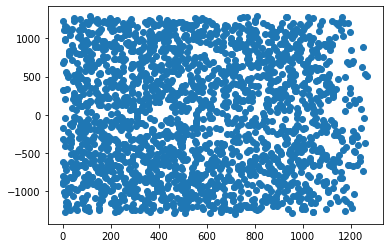

In [45]:
plt.scatter(Origin_R,Origin_Z)

In [13]:
# for a specific event grab the hits
EVENT=2106

MC_Xhit = []
MC_Yhit = []
MC_Zhit = []
MC_Thit = []

for x in range(DatL[EVENT],DatL[EVENT+1]):

    MC_Xhit.append(data.hits[x]["hit_position"][0])
    MC_Yhit.append(data.hits[x]["hit_position"][1])
    MC_Zhit.append(data.hits[x]["hit_position"][2])
    MC_Thit.append(data.hits[x]["hit_time"])
MC_Xhit = np.array(MC_Xhit)
MC_Yhit = np.array(MC_Yhit)
MC_Zhit = np.array(MC_Zhit)
MC_Thit = np.array(MC_Ihit)
loc = np.argmin(MC_Thit)


In [14]:
MC_Xhit[loc]

83.34784

In [12]:
MC_Ihit[163]

0.35080284

In [53]:
a = np.array([1,3,5,6,7])

In [59]:
a[(a<5) & (a>1)]

array([3])

In [ ]:
import numpy as np
import pandas as pd
import tables as tb
import os
import time
import glob

def Diff(li1, li2):
    return (list(set(li1) - set(li2)))

class Data_Mine():
    def setup_vol(self):
        binsR = np.arange(0,1301,10)
        binsZ = np.arange(-1301,1301,10)
        bins = [binsR,binsZ]

        self.Vbins_2d = bins
        self.Vhist_2d_all = np.zeros(shape=(len(binsR)-1,len(binsZ)-1))
        self.Vhist_2d_fid = np.zeros(shape=(len(binsR)-1,len(binsZ)-1))
        self.Vhist_2d_trk = np.zeros(shape=(len(binsR)-1,len(binsZ)-1))
        self.Vhist_2d_blo = np.zeros(shape=(len(binsR)-1,len(binsZ)-1))
        self.Vhist_2d_roi = np.zeros(shape=(len(binsR)-1,len(binsZ)-1))


TON_PATH_ANA  = "/n/holystore01/LABS/guenette_lab/Lab/data/NEXT/TON_SCALE/NEXT_HD/ANA.fanal_1_01_00/"
TON_PATH_MC   = "/n/holystore01/LABS/guenette_lab/Lab/data/NEXT/TON_SCALE/NEXT_HD/MC.nexus_p5_06_00/"
FWHM          = "FWHM_07/"
Voxel         = "Voxel_10x10x10/"

Regions = ["ACTIVE"]
WORKTYPE = "Bi214"
OUTFILE = "Vol_Bi214_hist_7_10.npy"
Regions = ["FIELD_CAGE", "READOUT_PLANE", "INNER_SHIELDING", "CATHODE"]

FULL = Data_Mine()
FULL.setup_vol()
ct = 0
for region in Regions:
    print("Starting on "+region)

    ANA_Dir = TON_PATH_ANA+WORKTYPE+"/"+region+"/"+FWHM+Voxel+"Output/"
    MC_Dir  = TON_PATH_MC +WORKTYPE+"/"+region+"/"+"Output/"
    
    ANA_File = glob.glob(ANA_Dir+"*.h5")
    ANA_File.sort()
    ANA_File_Comp = [i.split("/")[-1] for i in ANA_File]

    MC_File = glob.glob(MC_Dir+"*.h5")
    MC_File.sort()
    MC_File_Comp = [i.split("/")[-1] for i in MC_File]

    SAME_FILES = Diff(ANA_File_Comp,MC_File_Comp)
    SAME_FILES.sort()

    for FILE in SAME_FILES:
        ANA_Curr = ANA_Dir+FILE
        MC_Curr  = MC_Dir+FILE
        print("ANA file")
        print(ANA_Curr)
        print("MC file")
        print(MC_Curr)
        try:
            with tb.open_file(ANA_Curr) as ANA, tb.open_file(MC_Curr) as MC:
                try:
                    ANA.get_node_attr('/FANALIC/ANA_fwhm_07_voxel_10x10x10', 'simulated_events')
                    ct+=1
                    events = dat.root.FANALIC.ANA_fwhm_07_voxel_10x10x10.events.table.read()
                    data = MC.root.MC
                    Nevents = len(data.events)
                    DatL=[]
                    DatL.append(0)
                    for x in range(0,Nevents):
                        DatL.append(data.extents[x]["last_hit"])
                    
                    Origin_Z = []
                    Origin_R = []
                    FID = []
                    TRK = []
                    BLO = []
                    ROI = []
                    for EVENT in range(0,Nevents):
                        FID.append(int(events[q][14]))
                        TRK.append(int(events[q][25]))
                        BLO.append(int(events[q][28]))
                        ROI.append(int(events[q][29]))
                        
                        current_event = data.hits[DatL[EVENT]:DatL[EVENT+1]]
                        loc = np.argmin(current_event["hit_time"])
                        MC_X = current_event["hit_position"][loc][0]
                        MC_Y = current_event["hit_position"][loc][1]
                        MC_Z = current_event["hit_position"][loc][2]
                        if (region =="READOUT_PLANE"):
                            rn = np.random.uniform()
                            if rn>=0.5:
                                MC_Z *=-1
                        Origin_Z.append(MC_Z)
                        Origin_R.append(np.sqrt(MC_X**2 + MC_Y**2)) 

                    Origin_Z = np.array(Origin_Z)
                    Origin_R = np.array(Origin_R)
                    FID = np.array(FID)
                    TRK = np.array(TRK)
                    BLO = np.array(BLO)
                    ROI = np.array(ROI)
                    
                    FULL.Vhist_2d_all += np.histogram2d(Origin_R, Origin_Z, bins=FULL.Vbins_2d)[0]
                    FULL.Vhist_2d_fid += np.histogram2d(Origin_R[(FID==1)], Origin_Z[(FID==1)], bins=FULL.Vbins_2d)[0]
                    FULL.Vhist_2d_trk += np.histogram2d(Origin_R[(TRK==1)], Origin_Z[(TRK==1)], bins=FULL.Vbins_2d)[0]
                    FULL.Vhist_2d_blo += np.histogram2d(Origin_R[(BLO==1)], Origin_Z[(BLO==1)], bins=FULL.Vbins_2d)[0]
                    FULL.Vhist_2d_roi += np.histogram2d(Origin_R[(ROI==1)], Origin_Z[(ROI==1)], bins=FULL.Vbins_2d)[0]
                    
                    if ct%100 ==0:
                        np.save(OUTFILE,FULL)
                        print("Saved!")
                except AttributeError:
                    print("No simulated_events")
                    continue

        except tb.exceptions.HDF5ExtError:
            print("Cant Open this Fucker.")
            continue


np.save(OUTFILE,FULL)



In [ ]:
import numpy as np
import pandas as pd
import tables as tb
import os
import time
import glob

class Data_Mine():
    def setup_1d(self):
        binsR = np.arange(0,1301,10)
        binc = (binsR[:-1] + binsR[1:]) / 2
        self.R_hist_bin   = binsR
        self.R_hist_binc  = binc

        self.R_hist_all   = np.zeros(len(binsR)-1, dtype='int32')

    def setup_vol(self):
        binsR = np.arange(0,1301,10)
        binsZ = np.arange(-1301,1301,10)
        bins = [binsR,binsZ]

        self.Vbins_2d = bins
        self.Vhist_2d_all = np.zeros(shape=(len(binsR)-1,len(binsZ)-1))
        



OUTFILE = "Vol_bb0nu_hist_fullMC.npy"

FULL = Data_Mine()
FULL.setup_vol()
FULL.setup_1d()
ct = 0

MC_Dir = "/n/holystore01/LABS/guenette_lab/Users/amcdonald/bb0nu_check/Outputs/"


MC_File = glob.glob(MC_Dir+"*.h5")
MC_File.sort()


for FILE in MC_File:
    MC_Curr  = FILE#MC_Dir+FILE
    print("MC file")
    print(MC_Curr)
    with tb.open_file(MC_Curr) as MC:
        ct+=1
        data = MC.root.MC
        Nevents = len(data.events)
        DatL=[]
        DatL.append(0)
        for x in range(0,Nevents):
            DatL.append(data.extents[x]["last_hit"])

        Origin_Z = []
        Origin_R = []

        for EVENT in range(0,Nevents):

            current_event = data.hits[DatL[EVENT]:DatL[EVENT+1]]
            loc = np.argmin(current_event["hit_time"])
            MC_X = current_event["hit_position"][loc][0]
            MC_Y = current_event["hit_position"][loc][1]
            MC_Z = current_event["hit_position"][loc][2]
            if (region =="READOUT_PLANE"):
                rn = np.random.uniform()
                if rn>=0.5:
                    MC_Z *=-1
            Origin_Z.append(MC_Z)
            Origin_R.append(np.sqrt(MC_X**2 + MC_Y**2))

        Origin_Z = np.array(Origin_Z)
        Origin_R = np.array(Origin_R)

        FULL.Vhist_2d_all += np.histogram2d(Origin_R, Origin_Z, bins=FULL.Vbins_2d)[0]
        FULL.R_hist_all += np.histogram(Origin_R, FULL.R_hist_bin)[0]

        if ct%100 ==0:
            np.save(OUTFILE,FULL)
            print("Saved!")

np.save(OUTFILE,FULL)

